<a href="https://colab.research.google.com/github/Jaime-Simoes/TM_Project1/blob/main/Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# @title Data Exploration (1st step guidelines)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import string
from nltk.corpus import stopwords
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import gensim.downloader as api

In [2]:
# Load the datasets

train_df = pd.read_excel("train.xlsx")
train_reviews_df = pd.read_excel("train_reviews.xlsx")

test_df = pd.read_excel("test.xlsx")
test_reviews_df = pd.read_excel("test_reviews.xlsx")

In [3]:
train_df.head()

,index,description,host_about,unlisted
0,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0
1,2,"O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1
2,3,Trafaria’s House is a cozy and familiar villa ...,"I am a social person liking to communicate, re...",1
3,4,"Apartamento Charmoso no Chiado, Entre o Largo ...",Hello!_x000D_\nI m Portuguese and i love to me...,0
4,5,Joli appartement en bordure de mer.<br /> 2 m...,Nous sommes une famille avec deux enfants de 1...,0


In [4]:
train_df.shape

(6248, 4)

In [5]:
train_reviews_df.head()

,index,comments
0,1,this is a very cozy and comfortable house to s...
1,1,good<br/>
2,1,"My first hostel experience, and all I have to ..."
3,1,Das Hostel war neu und deshalb funktionierte a...
4,1,"It was fine for a dorm, but I think for the pe..."


In [6]:
train_reviews_df.shape

(361281, 2)

In [7]:
test_df.head()

,index,description,host_about
0,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de..."
1,2,"IMPORTANT: In response to COVID-19, this prope...",We are the be@home Team!\n\nYou can count on u...
2,3,"Bright, beautiful, and spacious. This four-bed...","Hi there!\n\nWe're GuestReady, a professional ..."
3,4,Charming Apartment Close to the Bay of Cascais...,:)
4,5,"Se procura umas férias perto da praia, casino ...",Bem vindos a Portugal!_x000D_\nAdoro o meu Paí...


In [8]:
test_df.shape

(695, 3)

In [9]:
test_reviews_df.head()

,index,comments
0,1,Thank you very much Antonio ! All has been per...
1,1,Very nice appartment in the old town of Lissab...
2,1,When travelling we're looking for kids friendl...
3,1,We've been in Lisbon in march 2013 (3 adults a...
4,1,Our host Antonio was very helpful with informa...


In [10]:
test_reviews_df.shape

(41866, 2)

In [11]:
index_values_train_df = train_df['index'].value_counts()
print(index_values_train_df)

# Each index (Airbnb location) appears once
# goes from 1 to 6248

index
1       1
4150    1
4172    1
4171    1
4170    1
       ..
2081    1
2080    1
2079    1
2078    1
6248    1
Name: count, Length: 6248, dtype: int64


In [12]:
index_values_train_reviews_df = train_reviews_df['index'].value_counts()
print(index_values_train_reviews_df)

# Different amount of reviews per place

index
265     891
3396    765
1147    678
4106    617
954     583
       ... 
6092      1
376       1
4480      1
1759      1
6139      1
Name: count, Length: 4245, dtype: int64


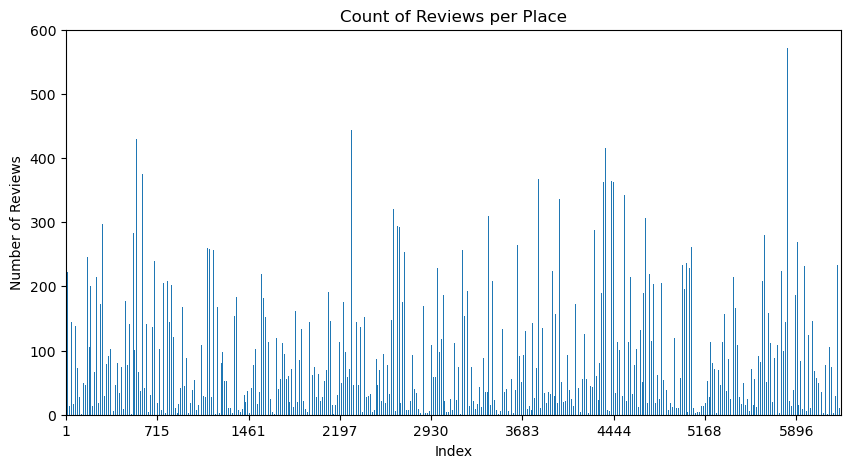

In [13]:
# Get distribution of amount per each index

index_values_train_reviews_df = train_reviews_df['index'].value_counts()

sorted_index_values_train_reviews_df = index_values_train_reviews_df.sort_index()
plt.figure(figsize=(10, 5))
sorted_index_values_train_reviews_df.plot(kind='bar')

plt.xticks(range(0, len(sorted_index_values_train_reviews_df), 500), rotation=0)
plt.ylim(0, 600)

plt.title('Count of Reviews per Place')
plt.xlabel('Index')
plt.ylabel('Number of Reviews')
plt.show()

In [14]:
# Get the places that don't have reviews

missing_indexes_train = set(range(1, 6249)) - set(index_values_train_reviews_df.index)
amount_missing = len(missing_indexes_train)      # amount of places with no review

print("Places that don't have reviews:", amount_missing)

Places that don't have reviews: 2003


In [15]:
(amount_missing / 6248) * 100      # percentage of places with no reviews (very high)

# Do we delete these ones ?? Depends on test statistics. Let's see if we need to predict places in the test set that also don't have reviews
# in the test_reviews set. Because if so we also need to train the model for those instances. Can't change the test dataset!

32.058258642765686

In [16]:
index_values_test_df = test_df['index'].value_counts()
print(index_values_test_df)

# from 1 to 695

index
1      1
468    1
460    1
461    1
462    1
      ..
234    1
235    1
236    1
237    1
695    1
Name: count, Length: 695, dtype: int64


In [17]:
index_values_test_reviews_df = test_reviews_df['index'].value_counts()
print(index_values_test_reviews_df)

# Different amount of reviews per place

index
160    649
129    571
435    522
418    489
387    461
      ... 
138      1
141      1
38       1
83       1
453      1
Name: count, Length: 475, dtype: int64


In [18]:
# Get the places that don't have reviews

missing_indexes_test = set(range(1, 695)) - set(index_values_test_reviews_df.index)
amount_missing_test = len(missing_indexes_test)      # amount of places with no review

print("Places that don't have reviews:", amount_missing_test)

Places that don't have reviews: 220


In [19]:
(amount_missing_test / 695) * 100      # also high

31.654676258992804

In [20]:
# percentage of places that don't have reviews is the same for training and testing.
# because we can't change test set we need to also include in the model these situations
# so, not deleting these rows

# but feels very weird. like 1/3 of predictions is on 0 reviews. I don't know...

In [21]:
# Now let's merge both training sets into one df:

In [22]:
train_reviews_df['comments'] = train_reviews_df['comments'].astype(str)

# Group comments by index and join them with " ## "
comments_grouped = train_reviews_df.groupby('index')['comments'].apply(lambda x: ' '.join(x)).reset_index()

# Merge with train_df_cleaned
train_df = train_df.merge(comments_grouped, how='left', on='index')

In [23]:
train_df.head()

,index,description,host_about,unlisted,comments
0,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,this is a very cozy and comfortable house to s...
1,2,"O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1,NaN
2,3,Trafaria’s House is a cozy and familiar villa ...,"I am a social person liking to communicate, re...",1,NaN
3,4,"Apartamento Charmoso no Chiado, Entre o Largo ...",Hello!_x000D_\nI m Portuguese and i love to me...,0,NaN
4,5,Joli appartement en bordure de mer.<br /> 2 m...,Nous sommes une famille avec deux enfants de 1...,0,Un très bel appartement avec une magnifique vu...


In [24]:
print(train_df['comments'].isna().sum())       # checks out

2003


In [25]:
# We can also make the same merge for test datasets:

In [26]:
test_reviews_df['comments'] = test_reviews_df['comments'].astype(str)
test_comments_grouped = test_reviews_df.groupby('index')['comments'].apply(lambda x: ' '.join(x)).reset_index()
test_df = test_df.merge(test_comments_grouped, how='left', on='index')

In [27]:
test_df.head()

,index,description,host_about,comments
0,1,<b>The space</b><br />Apartment located in the...,"Gosto de viajar, de conhecer pessoas, gosto de...",Thank you very much Antonio ! All has been per...
1,2,"IMPORTANT: In response to COVID-19, this prope...",We are the be@home Team!\n\nYou can count on u...,"This is a beautiful, bright apartment in a mor..."
2,3,"Bright, beautiful, and spacious. This four-bed...","Hi there!\n\nWe're GuestReady, a professional ...",NaN
3,4,Charming Apartment Close to the Bay of Cascais...,:),Claudia was a great host. She met us at the t...
4,5,"Se procura umas férias perto da praia, casino ...",Bem vindos a Portugal!_x000D_\nAdoro o meu Paí...,La maison est exactement comme sur les photos....


In [28]:
print(test_df["comments"][0])

Thank you very much Antonio ! All has been perfect during our stay, and the appartment is perfectly located in your fabulous city. We would love to visit you again next time :)_x000D_<br/> Very nice appartment in the old town of Lissabon, quite central but still calm in a small lane. No traffic noises etc.! There was enough space for 6 people, everything was clean, kitchen full equipped. Nice contact with the owner. Recommended! When travelling we're looking for kids friendly places to stay, and Antonios place was such a place. It's spacious and well equipped._x000D_<br/>_x000D_<br/>He's friendly mother was at the apartment to greet us and she had made ready a baby bed, a high chair and bought cookies,fruit and buns. Very nice._x000D_<br/>_x000D_<br/>The apartment had a hint of damp smell upon arriving, but after we have had the heaters on for some time it disappeared. So stay in the apartment for more than 15 minuttes._x000D_<br/>_x000D_<br/>The neighborhood is nice and we found good 

In [29]:
print(test_df["comments"].isna().sum())      # checks out

220


In [30]:
# So now we have two datasets: "train_df" and "test_df"

In [31]:
print(train_df.isna().sum())

index             0
description       0
host_about        0
unlisted          0
comments       2003
dtype: int64


In [32]:
print(test_df.isna().sum())

index            0
description      0
host_about       0
comments       220
dtype: int64


In [33]:
# No more missing values. So now it's just more specific analysis

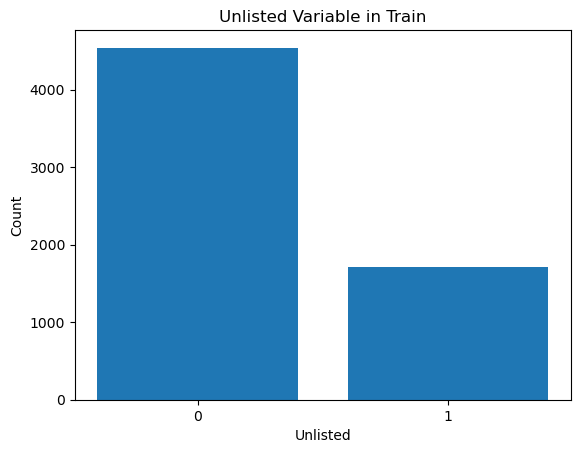

In [34]:
unlisted_counts = train_df['unlisted'].value_counts()


plt.bar(unlisted_counts.index, unlisted_counts.values)
plt.xlabel('Unlisted')
plt.ylabel('Count')
plt.title('Unlisted Variable in Train')
plt.xticks([0, 1])
plt.show()

##Analyzing train_df more in depth (following 1st practical class)

In [35]:
# Calculate word count for the "description" column
train_df['description_word_count'] = train_df['description'].apply(lambda x: len(str(x).split(" ")))

# Calculate word count for the "host_about" column
train_df['host_about_word_count'] = train_df['host_about'].apply(lambda x: len(str(x).split(" ")))

# Calculate word count for the "comments" column
train_df['comments_word_count'] = train_df['comments'].apply(lambda x: len(str(x).split(" ")))

In [36]:
train_df.head()

,index,description,host_about,unlisted,comments,description_word_count,host_about_word_count,comments_word_count
0,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0,this is a very cozy and comfortable house to s...,127,4,1331
1,2,"O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1,NaN,23,24,1
2,3,Trafaria’s House is a cozy and familiar villa ...,"I am a social person liking to communicate, re...",1,NaN,170,45,1
3,4,"Apartamento Charmoso no Chiado, Entre o Largo ...",Hello!_x000D_\nI m Portuguese and i love to me...,0,NaN,47,31,1
4,5,Joli appartement en bordure de mer.<br /> 2 m...,Nous sommes une famille avec deux enfants de 1...,0,Un très bel appartement avec une magnifique vu...,101,37,1064


In [37]:
train_df.description_word_count.describe()

count    6248.000000
mean      132.860755
std        48.084904
min         3.000000
25%        99.000000
50%       157.000000
75%       167.000000
max       210.000000
Name: description_word_count, dtype: float64

In [38]:
train_df.host_about_word_count.describe()

count    6248.000000
mean       73.653009
std        79.660191
min         1.000000
25%        26.000000
50%        55.000000
75%       101.000000
max      1387.000000
Name: host_about_word_count, dtype: float64

In [39]:
train_df.comments_word_count.describe()

count     6248.000000
mean      2774.291773
std       4530.494404
min          1.000000
25%          1.000000
50%        787.000000
75%       3497.000000
max      46976.000000
Name: comments_word_count, dtype: float64

In [40]:
train_df['comments'] = train_df['comments'].fillna('')       # Na give problems bellow, convert to string type like this

test_df["comments"] = test_df["comments"].fillna('')

In [41]:
# Get most frequent 'words' for all three columns

description_words = ' '.join(train_df['description']).split()
description_freq = pd.Series(description_words).value_counts()
top_10_description_words = description_freq.head(10)

host_about_words = ' '.join(train_df['host_about']).split()
host_about_freq = pd.Series(host_about_words).value_counts()
top_10_host_about_words = host_about_freq.head(10)

comments_words = ' '.join(train_df['comments']).split()
comments_freq = pd.Series(comments_words).value_counts()
top_10_comments_words = comments_freq.head(10)

print("Top 10 most frequent words in the 'description' column:")
print(top_10_description_words)
print("\nTop 10 most frequent words in the 'host_about' column:")
print(top_10_host_about_words)
print("\nTop 10 most frequent words in the 'comments' column:")
print(top_10_comments_words)

Top 10 most frequent words in the 'description' column:
the      31323
and      27698
a        25540
/><br    17380
to       15328
of       15122
in       13866
with     13649
is       12083
de        6918
Name: count, dtype: int64

Top 10 most frequent words in the 'host_about' column:
and    16358
to     13291
the    10797
a      10535
in      9860
of      6524
I       6419
you     6248
de      4325
We      4206
Name: count, dtype: int64

Top 10 most frequent words in the 'comments' column:
and     553157
the     515963
a       398631
to      328675
is      258191
in      249469
was     239807
of      174087
very    156654
The     143987
Name: count, dtype: int64


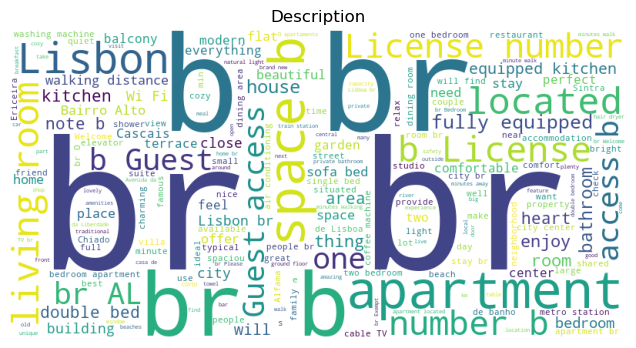

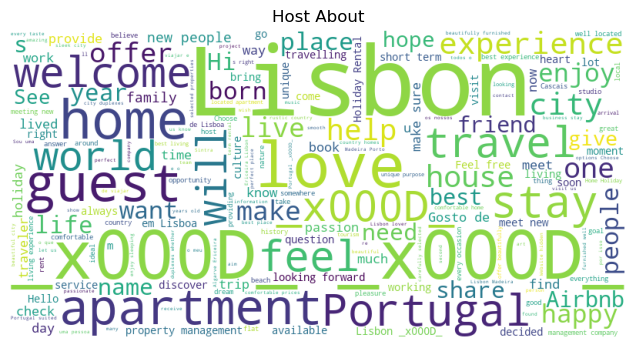

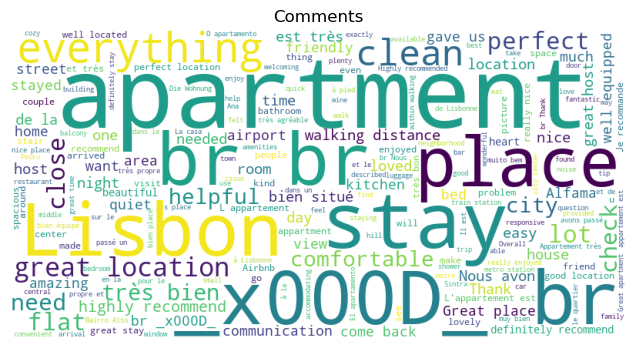

In [42]:
def wordcloud(column, title):

    text = ' '.join(column)

    # Create WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

    # Plotting the word cloud
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(title)
    plt.show()

wordcloud(train_df['description'], 'Description')

wordcloud(train_df['host_about'], 'Host About')

wordcloud(train_df['comments'], 'Comments')

## Data Preprocessing (2nd step guidelines)

In [43]:
# Separating into list with each element being one word

train_df['description'] = train_df['description'].str.split()
train_df['host_about'] = train_df['host_about'].str.split()
train_df['comments'] = train_df['comments'].str.split()

In [44]:
train_df.head()

,index,description,host_about,unlisted,comments,description_word_count,host_about_word_count,comments_word_count
0,1,"[This, is, a, shared, mixed, room, in, our, ho...","[Alojamento, Local, Registro:, 20835/AL]",0,"[this, is, a, very, cozy, and, comfortable, ho...",127,4,1331
1,2,"[O, meu, espaço, fica, perto, de, Parque, Edua...","[I, am, friendly, host,, and, I, will, try, to...",1,[],23,24,1
2,3,"[Trafaria’s, House, is, a, cozy, and, familiar...","[I, am, a, social, person, liking, to, communi...",1,[],170,45,1
3,4,"[Apartamento, Charmoso, no, Chiado,, Entre, o,...","[Hello!_x000D_, I, m, Portuguese, and, i, love...",0,[],47,31,1
4,5,"[Joli, appartement, en, bordure, de, mer.<br, ...","[Nous, sommes, une, famille, avec, deux, enfan...",0,"[Un, très, bel, appartement, avec, une, magnif...",101,37,1064


In [45]:
# Doing the same for test set

test_df['description'] = test_df['description'].str.split()
test_df['host_about'] = test_df['host_about'].str.split()
test_df['comments'] = test_df['comments'].str.split()

In [46]:
test_df.head()

,index,description,host_about,comments
0,1,"[<b>The, space</b><br, />Apartment, located, i...","[Gosto, de, viajar,, de, conhecer, pessoas,, g...","[Thank, you, very, much, Antonio, !, All, has,..."
1,2,"[IMPORTANT:, In, response, to, COVID-19,, this...","[We, are, the, be@home, Team!, You, can, count...","[This, is, a, beautiful,, bright, apartment, i..."
2,3,"[Bright,, beautiful,, and, spacious., This, fo...","[Hi, there!, We're, GuestReady,, a, profession...",[]
3,4,"[Charming, Apartment, Close, to, the, Bay, of,...",[:)],"[Claudia, was, a, great, host., She, met, us, ..."
4,5,"[Se, procura, umas, férias, perto, da, praia,,...","[Bem, vindos, a, Portugal!_x000D_, Adoro, o, m...","[La, maison, est, exactement, comme, sur, les,..."


In [47]:
test_df["host_about"][0][0]

'Gosto'

In [48]:
# I think we could leave punctuation in

In [49]:
# Lowering cases for everything:      ( Making new dfs as a "save point" )

In [50]:
# Might be this that is blowing up RAM

train_df_2 = train_df
test_df_2 = test_df

In [51]:
train_df_2['description'] = train_df_2['description'].apply(lambda x: [word.lower() for word in x])
train_df_2['host_about'] = train_df_2['host_about'].apply(lambda x: [word.lower() for word in x])
train_df_2['comments'] = train_df_2['comments'].apply(lambda x: [word.lower() for word in x])

train_df_2.head()

,index,description,host_about,unlisted,comments,description_word_count,host_about_word_count,comments_word_count
0,1,"[this, is, a, shared, mixed, room, in, our, ho...","[alojamento, local, registro:, 20835/al]",0,"[this, is, a, very, cozy, and, comfortable, ho...",127,4,1331
1,2,"[o, meu, espaço, fica, perto, de, parque, edua...","[i, am, friendly, host,, and, i, will, try, to...",1,[],23,24,1
2,3,"[trafaria’s, house, is, a, cozy, and, familiar...","[i, am, a, social, person, liking, to, communi...",1,[],170,45,1
3,4,"[apartamento, charmoso, no, chiado,, entre, o,...","[hello!_x000d_, i, m, portuguese, and, i, love...",0,[],47,31,1
4,5,"[joli, appartement, en, bordure, de, mer.<br, ...","[nous, sommes, une, famille, avec, deux, enfan...",0,"[un, très, bel, appartement, avec, une, magnif...",101,37,1064


In [52]:
test_df_2['description'] = test_df_2['description'].apply(lambda x: [word.lower() for word in x])
test_df_2['host_about'] = test_df_2['host_about'].apply(lambda x: [word.lower() for word in x])
test_df_2['comments'] = test_df_2['comments'].apply(lambda x: [word.lower() for word in x])

test_df_2.head()

# Should we also add the three columns of the counts to test set? Could make sense for the model ... discuss

,index,description,host_about,comments
0,1,"[<b>the, space</b><br, />apartment, located, i...","[gosto, de, viajar,, de, conhecer, pessoas,, g...","[thank, you, very, much, antonio, !, all, has,..."
1,2,"[important:, in, response, to, covid-19,, this...","[we, are, the, be@home, team!, you, can, count...","[this, is, a, beautiful,, bright, apartment, i..."
2,3,"[bright,, beautiful,, and, spacious., this, fo...","[hi, there!, we're, guestready,, a, profession...",[]
3,4,"[charming, apartment, close, to, the, bay, of,...",[:)],"[claudia, was, a, great, host., she, met, us, ..."
4,5,"[se, procura, umas, férias, perto, da, praia,,...","[bem, vindos, a, portugal!_x000d_, adoro, o, m...","[la, maison, est, exactement, comme, sur, les,..."


In [53]:
# Removing weird symbols:

In [54]:
def clean_text(words):

    # first join everything
    text = ' '.join(words)

    # what to remove
    pattern = re.compile(r'<[^>]*>|<br\s*/?>|_x000d_')

    # replace by empty string
    cleaned_text = re.sub(pattern, '', text)

    cleaned_words = cleaned_text.split()

    return cleaned_words

# Apply to dfs to remove symbols

columns_to_clean_train = ["description", "host_about", "comments"]

for column in columns_to_clean_train:
    train_df_2[column] = train_df_2[column].apply(clean_text)

columns_to_clean_test = ["description", "host_about", "comments"]

for column in columns_to_clean_test:
    test_df_2[column] = test_df_2[column].apply(clean_text)

In [55]:
test_df_2.head()

,index,description,host_about,comments
0,1,"[the, spaceapartment, located, in, the, histor...","[gosto, de, viajar,, de, conhecer, pessoas,, g...","[thank, you, very, much, antonio, !, all, has,..."
1,2,"[important:, in, response, to, covid-19,, this...","[we, are, the, be@home, team!, you, can, count...","[this, is, a, beautiful,, bright, apartment, i..."
2,3,"[bright,, beautiful,, and, spacious., this, fo...","[hi, there!, we're, guestready,, a, profession...",[]
3,4,"[charming, apartment, close, to, the, bay, of,...",[:)],"[claudia, was, a, great, host., she, met, us, ..."
4,5,"[se, procura, umas, férias, perto, da, praia,,...","[bem, vindos, a, portugal!, adoro, o, meu, paí...","[la, maison, est, exactement, comme, sur, les,..."


In [56]:
# Applying "Stop Words":      (We have different languages)

In [57]:
nltk.download('stopwords')

stop_english = set(stopwords.words('english'))
stop_portuguese = set(stopwords.words('portuguese'))
stop_italian = set(stopwords.words('italian'))
stop_spanish = set(stopwords.words('spanish'))
stop_french = set(stopwords.words('french'))
stop_german = set(stopwords.words('german'))
stop_russian = set(stopwords.words('russian'))
stop_japanese = {
    'の', 'に', 'は', 'を', 'た', 'が', 'で', 'て', 'と', 'し', 'れ', 'さ', 'ある', 'いる', 'も',
    'する', 'から', 'な', 'こと', 'として', 'い', 'や', 'れる', 'など', 'なっ', 'ない', 'この', 'ため',
    'その', 'たり', 'ます', 'れた', 'へ', 'なり', 'だ', 'なら', 'できる', 'よう', 'について', 'あっ', 'しかし'
}         # Custom because japanese is not in the library
stop_korean = {
    '이', '는', '가', '을', '를', '로', '에서', '에', '와', '과', '의', '으로', '만', '도', '안', '것', '그',
    '하', '한', '다', '할', '등', '더', '수', '저', '거', '보다', '위', '좀', '에게', '되', '중', '게', '는데', '잘',
    '못', '많이', '내', '와', '같은', '지', '인', '한테', '나', '한테', '가지', '때문에', '대해', '같은', '던', '다고', '하고', '지만', '한다', '됨'
}        # same as japanese
stop_chinese = set(stopwords.words('chinese'))
stop_dutch = set(stopwords.words('dutch'))
stop_swedish = set(stopwords.words('swedish'))
stop_norwegian = set(stopwords.words('norwegian'))
stop_danish = set(stopwords.words('danish'))

# Combine all languages
all_stop_words = (
    stop_english.union(stop_portuguese, stop_italian, stop_spanish, stop_french, stop_german, stop_russian,
                       stop_japanese, stop_korean, stop_chinese, stop_dutch, stop_swedish, stop_norwegian, stop_danish)
)

# Apply stop words to text
def remove_stop_words(text):
    return [word for word in text if word.lower() not in all_stop_words]

# Apply to both dataframes
for column in columns_to_clean_train:
    train_df_2[column] = train_df_2[column].apply(remove_stop_words)
for column in columns_to_clean_test:
    test_df_2[column] = test_df_2[column].apply(remove_stop_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jaime\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [58]:
# Now let's do "Regular Expressions" :   ( for currency, dates, measurements, abbreviations, spelling )

In [59]:

def regular_currency(text):
    regular_text = re.sub(r'[$€£]\d+(\.\d+)?', '#COST', text)
    regular_text = re.sub(r'\b\d+\s?(USD|EUR|GBP)\b', '#COST', text)
    regular_text = re.sub(r'\b\d+\s?(dollars|euros|pounds)\b', '#COST', text)
    return regular_text

def regular_dates(text):
    regular_text = re.sub(r'(\d{1,2})/(\d{1,2})/(\d{4})', r'\3-\1-\2', text)
    regular_text = re.sub(r'(\d{4})-(\d{1,2})-(\d{1,2})', r'\3/\2/\1', text)
    return regular_text

def regular_measurements(text):
    regular_text = re.sub(r'\bm(eters)?\b', 'meter', text)
    regular_text = re.sub(r'\b(km|kilometers)\b', 'kilometer', text)
    regular_text = re.sub(r'\b(miles|mi)\b', 'mile', text)
    return regular_text

def regular_abbreviations(text):
    abbreviations = {
        'USA': 'united states of america',
        'UK': 'united kingdom',
        'US': 'united states',
        'EU': 'european union',
    }
    for abbreviation, full_form in abbreviations.items():
        text = re.sub(r'\b{}\b'.format(abbreviation), full_form, text)
    return text

def regular_spelling(text):
    spelling_variations = {
        'colour': 'color',
        'favourite': 'favorite',
        'centre': 'center',
        'travelling': 'traveling',
        'organisation': 'organization',
        'recognise': 'recognize',
        'cheque': 'check',
        'catalogue': 'catalog',
        'neighbour': 'neighbor',
    }

    for misspelling, correct_spelling in spelling_variations.items():
        text = re.sub(r'\b{}\b'.format(misspelling), correct_spelling, text)
    return text


In [60]:
def apply_normalization(column, df):
    for i, row in df.iterrows():
        normalized_column = []
        for element in row[column]:
            element = regular_currency(element)
            element = regular_dates(element)
            element = regular_measurements(element)
            element = regular_abbreviations(element)
            element = regular_spelling(element)
            normalized_column.append(element)
        df.at[i, column] = normalized_column
    return df


columns_to_normalize = ['description', 'host_about', 'comments']
for column in columns_to_normalize:
    train_df_2 = apply_normalization(column, train_df_2)
    test_df_2 = apply_normalization(column, test_df_2)

In [61]:
# Let's remove punctuation:

In [62]:
def remove_punctuation(text):
    return [re.sub(r'[^\w\s]', '', word) for word in text]

def applying(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            df[column] = df[column].apply(remove_punctuation)
    return df

train_df_2 = applying(train_df_2)
test_df_2 = applying(test_df_2)

In [63]:
test_df_2.head()

,index,description,host_about,comments
0,1,"[spaceapartment, located, historic, center, li...","[gosto, viajar, conhecer, pessoas, gosto, rece...","[thank, much, antonio, , perfect, stay, appart..."
1,2,"[important, response, covid19, property, exten...","[behome, team, count, us, take, care, every, s...","[beautiful, bright, apartment, residential, ar..."
2,3,"[bright, beautiful, spacious, fourbedroom, apa...","[hi, there, were, guestready, professional, pr...",[]
3,4,"[charming, apartment, close, bay, cascais1, be...",[],"[claudia, great, host, us, train, station, bri..."
4,5,"[procura, umas, férias, perto, praia, casino, ...","[bem, vindos, portugal, adoro, país, adoro, co...","[maison, exactement, comme, photos, cest, très..."


In [64]:
# Stemming and lemmatization

In [65]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jaime\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [66]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jaime\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [67]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\jaime\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [68]:
# Only stemming. Because we have different languages lemmatization is a lot more complicated.

In [69]:
stemmers = {
    'english': SnowballStemmer('english'),
    'portuguese': SnowballStemmer('portuguese'),
    'italian': SnowballStemmer('italian'),
    'spanish': SnowballStemmer('spanish'),
    'french': SnowballStemmer('french'),
    'german': SnowballStemmer('german'),
    'russian': SnowballStemmer('russian'),
    'dutch': SnowballStemmer('dutch'),
    'swedish': SnowballStemmer('swedish'),
    'norwegian': SnowballStemmer('norwegian'),
    'danish': SnowballStemmer('danish')
}

column_language_mapping = {
    'description': 'english',
    'host_about': 'english',
    'comments': 'english'
}

columns = ["description", "host_about", "comments"]
for column in columns:
    lang = column_language_mapping[column]
    # Apply stemming
    train_df_2[column] = train_df_2[column].apply(lambda x: [stemmers[lang].stem(word) for word in x])
    test_df_2[column] = test_df_2[column].apply(lambda x: [stemmers[lang].stem(word) for word in x])

In [70]:
# Need to do some more pre processing to get the extra points !

In [71]:
# Splitting training dataset:   ( Don't forget to use Kfold when fitting the models later )

In [72]:
X = train_df_2.drop(columns=['unlisted'])
y = train_df_2['unlisted']

# Splitting the training dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)
# using stratify to maintain the proportions of the target variable

In [73]:
X_train.head()     # Need to discuss if we keep the columns of 'amount of words'...

,index,description,host_about,comments,description_word_count,host_about_word_count,comments_word_count
320,321,"[heart, silver, coast, lourinhã, histor, famil...","[comissário, bordo, viajando, mundo, esperamo,...","[realli, except, hous, , wonder, room, well, e...",104,37,914
2203,2204,"[smart, studio, carcavelo, residência, conta, ...","[smart, studio, criada, 2016, oferec, residênc...",[],82,23,1
349,350,"[comfi, cozi, renov, apart, view, overlook, si...","[found, travel, enthusiast, just, like, you, b...","[love, everyth, place, villag, close, enough, ...",165,71,441
4753,4754,"[cosi, duplex, apart, uniqu, place, right, hea...","[hi, im, christoph, , love, lisbon, ill, happi...","[nice, help, peopl, nice, great, apart, nestl,...",172,28,2161
2207,2208,"[oferecemo, hosped, total, lazer, conforto, in...","[administrador, travel, lisbon]",[],149,7,1


In [74]:
y_val.head()

1097    0
262     1
1920    0
912     0
3537    0
Name: unlisted, dtype: int64

##Feature Enginnering (3rd step guidelines)

In [75]:
# TF-IDF and GolVe do similar things. we can appl them separately and run the models separately and compare results.
# We can merge them using a sort of combination. We can also apply one after the other.
# There is no 'best way', but from what I read I think it would be better first apply GloVe and then TF-IDF.
# Discuss . . .

In [76]:
# For GloVe you can use pre trained ones or train a new one on your data. For now will use pre trained one,
# should be better I think. Discuss . . .

In [77]:
# Can't put it to work: please try the option of applying one then the other, it's much easier...

In [78]:
# If your primary focus is on capturing semantic meaning and relationships between words, using GloVe embeddings first might be beneficial.
# If you want to emphasize the importance of specific words or phrases in each document, TF-IDF first could be more suitable.

In [79]:
# Load pre-trained GloVe embeddings
glove_model = api.load("glove-wiki-gigaword-100")

def get_glove_embedding(word):
    if word in glove_model:
        return glove_model[word]
    else:
        return np.zeros(glove_model.vector_size)

def apply_tfidf_then_glove(df, columns, max_length=50):
    tfidf = TfidfVectorizer(max_features=500, ngram_range=(1, 2))
    X_combined = {}

    for column in columns:
        # Join the words to form sentences
        sentences = [' '.join(words) for words in df[column]]

        # Apply TF-IDF
        tfidf_matrix = tfidf.fit_transform(sentences)
        tfidf_array = tfidf_matrix.toarray()

        # Apply GloVe embeddings
        glove_embeddings = []
        for sentence in sentences:
            embedding = [get_glove_embedding(word) for word in sentence.split()]
            embedding = np.array(embedding)
            if len(embedding) == 0:
                # Handle empty embeddings by filling with zeros
                embedding = np.zeros((1, glove_model.vector_size))
            elif len(embedding) < max_length:
                # Pad with zeros if the length is less than max_length
                padding = np.zeros((max_length - len(embedding), glove_model.vector_size))
                embedding = np.vstack((embedding, padding))
            elif len(embedding) > max_length:
                # Truncate if the length is greater than max_length
                embedding = embedding[:max_length]
            glove_embeddings.append(embedding)

        # Convert list of arrays to array
        avg_embeddings = np.array([np.mean(embedding, axis=0) for embedding in glove_embeddings])

        # Concatenate TF-IDF vectors with GloVe embeddings
        combined_data = np.hstack((tfidf_array, avg_embeddings))
        combined_data = np.array(combined_data)  # Convert to NumPy array

        X_combined[column] = combined_data

    return X_combined

# Apply TF-IDF first, then GloVe embeddings to your dataframes
X_train_combined = apply_tfidf_then_glove(X_train, columns)
X_val_combined = apply_tfidf_then_glove(X_val, columns)
test_combined = apply_tfidf_then_glove(test_df_2, columns)

In [80]:
test_df_2.head()

,index,description,host_about,comments
0,1,"[spaceapart, locat, histor, center, lisbonthi,...","[gosto, viajar, conhec, pessoa, gosto, receb, ...","[thank, much, antonio, , perfect, stay, appart..."
1,2,"[import, respons, covid19, properti, extend, c...","[behom, team, count, us, take, care, everi, si...","[beauti, bright, apart, residenti, area, littl..."
2,3,"[bright, beauti, spacious, fourbedroom, apart,...","[hi, there, were, guestreadi, profession, prop...",[]
3,4,"[charm, apart, close, bay, cascais1, bedroom, ...",[],"[claudia, great, host, us, train, station, bri..."
4,5,"[procura, uma, féria, perto, praia, casino, ou...","[bem, vindo, portug, adoro, paí, adoro, conhec...","[maison, exact, comm, photo, cest, très, propr..."


In [81]:
X_train_combined

{'description': array([[ 0.        ,  0.        ,  0.        , ..., -0.1268446 ,
          0.19595661, -0.0083481 ],
        [ 0.        ,  0.        ,  0.        , ..., -0.04427454,
         -0.0050476 , -0.03812569],
        [ 0.        ,  0.        ,  0.        , ..., -0.0455008 ,
          0.21400927,  0.0660574 ],
        ...,
        [ 0.        ,  0.        ,  0.        , ..., -0.03801016,
          0.34924866,  0.05680282],
        [ 0.        ,  0.        ,  0.        , ..., -0.13847188,
          0.24170396,  0.12646742],
        [ 0.        ,  0.        ,  0.        , ..., -0.01582526,
          0.24599232,  0.05336657]]),
 'host_about': array([[ 0.        ,  0.        ,  0.        , ..., -0.06807236,
         -0.0216408 ,  0.01123832],
        [ 0.        ,  0.        ,  0.        , ...,  0.018232  ,
          0.03550534, -0.0068904 ],
        [ 0.        ,  0.        ,  0.        , ..., -0.17294988,
          0.2813098 ,  0.13600118],
        ...,
        [ 0.        ,  0.

In [82]:
## Saving the resulting info to go for the models. Will use separate notebook.

In [83]:
np.savez("combined_representations.npz", 
         X_train=X_train_combined, 
         X_val=X_val_combined, 
         test=test_combined,
         y_train=y_train,
         y_val=y_val)